In [1]:
import sys
import pickle
import numpy as np
from numpy import array, ndarray
from pandas import read_csv, DataFrame, Series, concat
from matplotlib.pyplot import figure, savefig, show, subplots
from matplotlib.figure import Figure
from matplotlib.axes import Axes
from scipy.stats import norm, expon, lognorm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

sys.path.insert(1, '../../../../utils')
from dslabs_functions import get_variable_types, \
  CLASS_EVAL_METRICS, DELTA_IMPROVE, plot_bar_chart, plot_multiline_chart, plot_evaluation_results, \
  plot_horizontal_bar_chart, HEIGHT, plot_line_chart, dummify, run_NB, run_KNN, plot_multibar_chart, \
  encode_cyclic_variables, plot_confusion_matrix, NR_STDEV, determine_outlier_thresholds_for_var
from studies import naive_Bayes_study, knn_study, evaluate_approach, evaluate_and_plot

In [2]:
# filename = "../../data/prepared/traffic_balancing_undersampling.csv"
# filename = "../../data/prepared/traffic_balancing_SMOTE.csv"
filename = "../../data/prepared/traffic_best_bal.csv"

### **Feature Selection and Generation** ###

In [3]:
lab_folder = "lab3_preparation/feat_selection_generation"
metric="f1"
file_tag = "traffic"
task = "feat_selection_generation"
target_name = "crash_type"

input_df = read_csv(filename, na_values="")

In [4]:
input_df.head()

,crash_date,intersection_related_i,damage,num_units,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,...,prim_contributory_cause_RELATED TO BUS STOP,prim_contributory_cause_ROAD CONSTRUCTION/MAINTENANCE,prim_contributory_cause_ROAD ENGINEERING/SURFACE/MARKING DEFECTS,prim_contributory_cause_TEXTING,prim_contributory_cause_TURNING RIGHT ON RED,prim_contributory_cause_UNABLE TO DETERMINE,prim_contributory_cause_UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED),"prim_contributory_cause_VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)",prim_contributory_cause_WEATHER,crash_type
0,1.090028,1,-0.913779,-0.163369,-0.549600,-0.498198,0.0,-0.180456,-0.382173,-0.290697,...,False,False,False,False,False,True,False,False,False,0
1,1.106410,1,0.597795,-0.163369,-0.549600,-0.498198,0.0,-0.180456,-0.382173,-0.290697,...,False,False,False,False,False,False,False,False,False,0
2,0.413855,1,-0.913779,2.619242,-0.549600,-0.498198,0.0,-0.180456,-0.382173,-0.290697,...,False,False,False,False,False,False,False,False,False,0
3,1.102811,1,0.597795,-0.163369,1.745927,5.295272,0.0,-0.180456,5.502557,-0.290697,...,False,False,False,False,False,True,False,False,False,1
4,1.113899,1,-0.913779,-0.163369,-0.549600,-0.498198,0.0,-0.180456,-0.382173,-0.290697,...,False,False,False,False,False,False,False,False,False,0


In [5]:
from pandas import DataFrame, Index, read_csv
from dslabs_functions import (
    select_low_variance_variables,
    select_redundant_variables,
)

print("Original variables", input_df.columns.to_list())
vars2drop: list[str] = select_low_variance_variables(input_df, 3, target=target_name)
print("Variables to drop", vars2drop)

Original variables ['crash_date', 'intersection_related_i', 'damage', 'num_units', 'most_severe_injury', 'injuries_total', 'injuries_fatal', 'injuries_incapacitating', 'injuries_non_incapacitating', 'injuries_reported_not_evident', 'injuries_no_indication', 'crash_hour', 'crash_day_of_week', 'crash_month', 'traffic_control_device_BICYCLE CROSSING SIGN', 'traffic_control_device_DELINEATORS', 'traffic_control_device_FLASHING CONTROL SIGNAL', 'traffic_control_device_LANE USE MARKING', 'traffic_control_device_NO CONTROLS', 'traffic_control_device_NO PASSING', 'traffic_control_device_OTHER', 'traffic_control_device_OTHER RAILROAD CROSSING', 'traffic_control_device_OTHER REG. SIGN', 'traffic_control_device_OTHER WARNING SIGN', 'traffic_control_device_PEDESTRIAN CROSSING SIGN', 'traffic_control_device_POLICE/FLAGMAN', 'traffic_control_device_RAILROAD CROSSING GATE', 'traffic_control_device_RR CROSSING SIGN', 'traffic_control_device_SCHOOL ZONE', 'traffic_control_device_STOP SIGN/FLASHER', 'tr

In [6]:

print("Original variables", input_df.columns.values)
vars2drop: list[str] = select_redundant_variables(
    input_df, target=target_name, min_threshold=0.5
)
print("Variables to drop", vars2drop)

Original variables ['crash_date' 'intersection_related_i' 'damage' 'num_units'
 'most_severe_injury' 'injuries_total' 'injuries_fatal'
 'injuries_incapacitating' 'injuries_non_incapacitating'
 'injuries_reported_not_evident' 'injuries_no_indication' 'crash_hour'
 'crash_day_of_week' 'crash_month'
 'traffic_control_device_BICYCLE CROSSING SIGN'
 'traffic_control_device_DELINEATORS'
 'traffic_control_device_FLASHING CONTROL SIGNAL'
 'traffic_control_device_LANE USE MARKING'
 'traffic_control_device_NO CONTROLS' 'traffic_control_device_NO PASSING'
 'traffic_control_device_OTHER'
 'traffic_control_device_OTHER RAILROAD CROSSING'
 'traffic_control_device_OTHER REG. SIGN'
 'traffic_control_device_OTHER WARNING SIGN'
 'traffic_control_device_PEDESTRIAN CROSSING SIGN'
 'traffic_control_device_POLICE/FLAGMAN'
 'traffic_control_device_RAILROAD CROSSING GATE'
 'traffic_control_device_RR CROSSING SIGN'
 'traffic_control_device_SCHOOL ZONE'
 'traffic_control_device_STOP SIGN/FLASHER'
 'traffic_cont

### Approach 1

In [7]:
approach_fs1 = "selection_1"

# Approach 1: Drop low variance variables
# Low variance variables provide little discriminative power for classification

# Get variables to drop based on low variance (variance < 3)
low_var_vars2drop: list[str] = select_low_variance_variables(input_df, max_threshold=3, target=target_name)
print(f"Low variance variables to drop ({len(low_var_vars2drop)}): {low_var_vars2drop}")

# Create dataset without low variance variables
data_fs1 = input_df.drop(columns=low_var_vars2drop, inplace=False)
print(f"\nDataset shape: {input_df.shape} → {data_fs1.shape}")
print(f"Features removed: {input_df.shape[1] - data_fs1.shape[1]}")

Low variance variables to drop (14): ['crash_date', 'intersection_related_i', 'damage', 'num_units', 'most_severe_injury', 'injuries_total', 'injuries_fatal', 'injuries_incapacitating', 'injuries_non_incapacitating', 'injuries_reported_not_evident', 'injuries_no_indication', 'crash_hour', 'crash_day_of_week', 'crash_month']

Dataset shape: (234752, 150) → (234752, 136)
Features removed: 14


### Approach 2 - Drop Redundant Variables (High Correlation)

In [8]:
approach_fs2 = "selection_2"

# Approach 2: Drop redundant (highly correlated) variables
# Highly correlated variables provide redundant information

# Get variables to drop based on high correlation (correlation >= 0.5)
redundant_vars2drop: list[str] = select_redundant_variables(input_df, min_threshold=0.5, target=target_name)
print(f"Redundant variables to drop ({len(redundant_vars2drop)}): {redundant_vars2drop}")

# Create dataset without redundant variables
data_fs2 = input_df.drop(columns=redundant_vars2drop, inplace=False)
print(f"\nDataset shape: {input_df.shape} → {data_fs2.shape}")
print(f"Features removed: {input_df.shape[1] - data_fs2.shape[1]}")

Redundant variables to drop (11): ['injuries_total', 'injuries_incapacitating', 'injuries_non_incapacitating', 'most_severe_injury', 'injuries_reported_not_evident', 'weather_condition_RAIN', 'roadway_surface_cond_DRY', 'roadway_surface_cond_WET', 'weather_condition_CLEAR', 'lighting_condition_UNKNOWN', 'roadway_surface_cond_UNKNOWN']

Dataset shape: (234752, 150) → (234752, 139)
Features removed: 11


### Approach 3 - Combined: Drop Both Low Variance and Redundant Variables

In [9]:
approach_fs3 = "selection_3"

# Approach 3: Combine both feature selection methods
# First drop low variance, then drop redundant from remaining

# Combine all variables to drop (avoiding duplicates)
all_vars2drop = list(set(low_var_vars2drop + redundant_vars2drop))
print(f"Total variables to drop ({len(all_vars2drop)}): {all_vars2drop}")

# Create dataset without both low variance and redundant variables
data_fs3 = input_df.drop(columns=all_vars2drop, inplace=False)
print(f"\nDataset shape: {input_df.shape} → {data_fs3.shape}")
print(f"Features removed: {input_df.shape[1] - data_fs3.shape[1]}")

Total variables to drop (20): ['roadway_surface_cond_WET', 'injuries_total', 'injuries_non_incapacitating', 'weather_condition_CLEAR', 'num_units', 'crash_date', 'crash_day_of_week', 'crash_hour', 'crash_month', 'roadway_surface_cond_DRY', 'injuries_reported_not_evident', 'lighting_condition_UNKNOWN', 'damage', 'most_severe_injury', 'weather_condition_RAIN', 'injuries_no_indication', 'injuries_incapacitating', 'roadway_surface_cond_UNKNOWN', 'injuries_fatal', 'intersection_related_i']

Dataset shape: (234752, 150) → (234752, 130)
Features removed: 20


## Evaluate

In [ ]:
evaluate_and_plot(data_fs1, lab_folder, file_tag, approach_fs1, target_name, metric=metric)

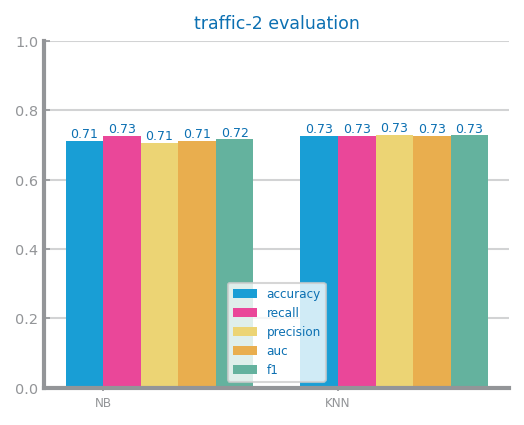

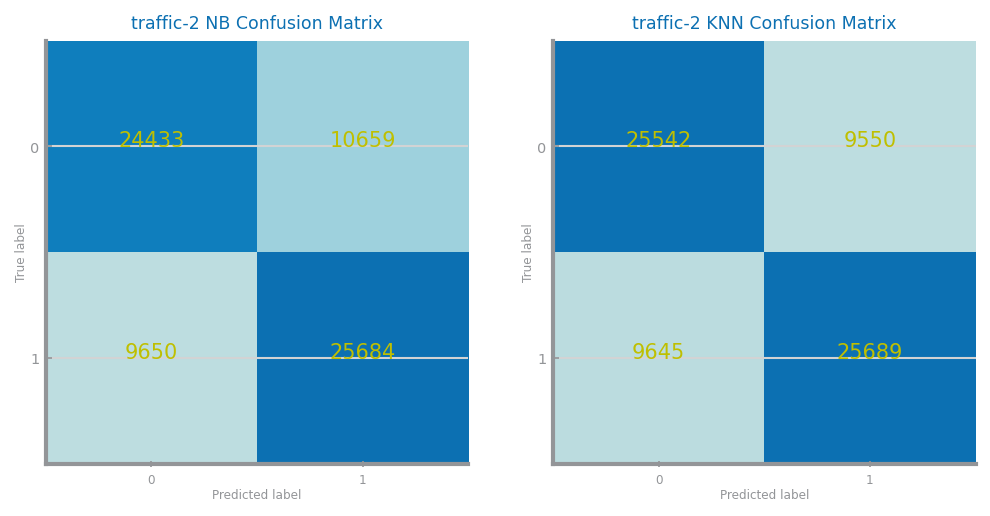

In [ ]:
evaluate_and_plot(data_fs2, lab_folder, file_tag, approach_fs2, target_name, metric=metric)

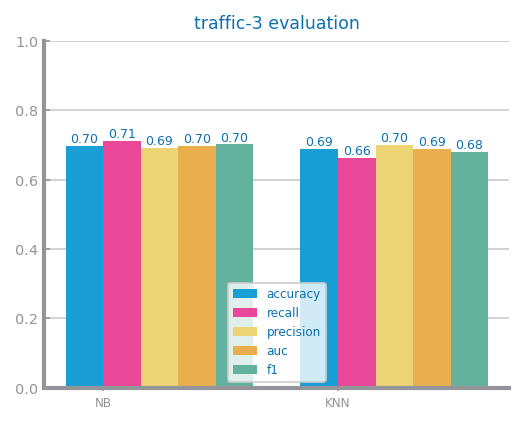

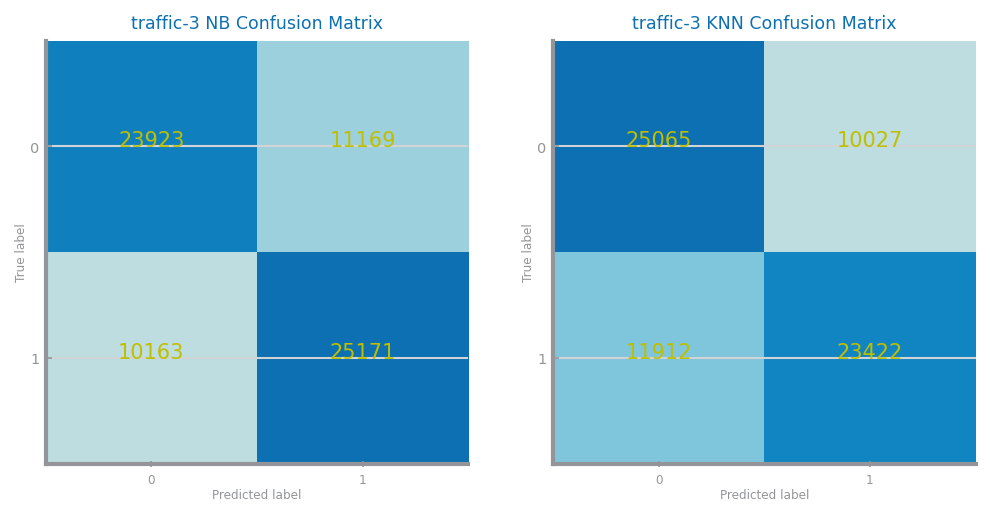

In [ ]:
evaluate_and_plot(data_fs3, lab_folder, file_tag, approach_fs3, target_name, metric=metric)

### Feature Selection Summary

In [ ]:
# Summary comparison
print("Feature Selection Comparison:")
print("=" * 60)
print(f"{'Approach':<30} {'Original':>10} {'Final':>10} {'Removed':>10}")
print("-" * 60)
print(f"{'Original dataset':<30} {input_df.shape[1]:>10} {'-':>10} {'-':>10}")
print(f"{'1. Low Variance':<30} {input_df.shape[1]:>10} {data_fs1.shape[1]:>10} {len(low_var_vars2drop):>10}")
print(f"{'2. Redundant Variables':<30} {input_df.shape[1]:>10} {data_fs2.shape[1]:>10} {len(redundant_vars2drop):>10}")
print(f"{'3. Combined':<30} {input_df.shape[1]:>10} {data_fs3.shape[1]:>10} {len(all_vars2drop):>10}")
print("=" * 60)

Feature Selection Comparison:
Approach                         Original      Final    Removed
------------------------------------------------------------
Original dataset                      150          -          -
1. Low Variance                       150        136         14
2. Redundant Variables                150        140         10
3. Combined                           150        130         20


## Save Best Result

Based on evaluation metrics, save the best performing approach.

In [ ]:
# Uncomment to save individual results
data_fs1.to_csv(f"../../data/prepared/{file_tag}_features_{approach_fs1}.csv", index=True)
data_fs2.to_csv(f"../../data/prepared/{file_tag}_features_{approach_fs2}.csv", index=True)    
data_fs3.to_csv(f"../../data/prepared/{file_tag}_features_{approach_fs3}.csv", index=True)

# approach 2 was best knn
best_df_fs = data_fs2.copy()
best_approach_fs = approach_fs2
best_df_fs.to_csv(f"../../data/prepared/traffic_best_fs.csv", index=False)
print(f"Best approach: {best_approach_fs}")
print(f"Shape: {best_df_fs.shape}")

Best approach: SMOTE
Shape: (234752, 150)


In [ ]:
data_best = best_df_fs.copy()
data_best.to_csv("../../data/prepared/best_model.csv", index=False)